In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['savefig.dpi'] = 300

In [2]:
N = 100
d1 = 1
d2 = 8
Pt = np.eye(N)
for i in range(N):
    for j in range(N):
        Pt[i,j] = np.sqrt(i*j/N/N)*np.exp(-0.5*((i-j)/d1)**2) + np.sqrt((1.0-float(i)/N)*(1.0-float(j)/N))*np.exp(-0.5*((i-j)/d2)**2) 

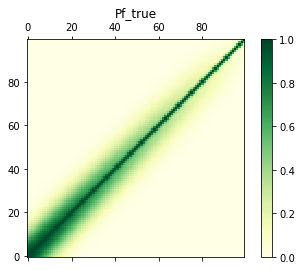

In [6]:
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
cmap = 'YlGn'
fig, ax = plt.subplots()
mappable = ax.matshow(Pt, cmap=cmap)
ax.invert_yaxis()
ax.set_title('Pf_true')
fig.colorbar(mappable, ax=ax, orientation='vertical')
fig.savefig('Pf_true.png')
plt.show()

In [3]:
from scipy.linalg import eigh, norm
eigs, eigv = eigh(Pt)
sPt = eigv @ np.diag(np.sqrt(eigs))
print(sPt.shape)
print(norm(Pt - sPt@sPt.transpose()))

(100, 100)
6.341124912457197e-14


In [16]:
K = 10
rs = np.random.RandomState()
Xf = rs.standard_normal(size=(N,K))
Xf = sPt @ Xf
Pe = Xf @ Xf.transpose() / (K-1)
err = norm(Pt - Pe)
print(err)

31.808180245523474


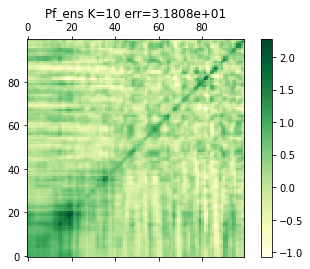

In [17]:
fig, ax = plt.subplots()
mappable = ax.matshow(Pe, cmap=cmap)
ax.invert_yaxis()
ax.set_title(f'Pf_ens K={K} err={err:.4e}')
fig.colorbar(mappable, ax=ax, orientation='vertical')
fig.savefig(f'Pf_ens_{K}.png')
plt.show()